**Table of Contents**

Part I: Analyzing US Counties Dataset

1. Read & preprocess raw data
2. Descriptive analysis
3. Predictive analysis
4. Prescriptive analysis (INCOMPLETE WORK)

Part II: Analyzing World Countries Dataset (INCOMPLETE WORK)
1. Read & preprocess raw data
2. Descriptive analysis
3. Predictive analysis

*****

In [1]:
# Third-party python modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 144

In [2]:
import seaborn as sns
sns.set()
#sns.set(font_scale=1.5)

C:\Users\Biware\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import itertools

In [4]:
# Local modules

import preprocessing
import feature_engineering
import visualization
import prediction

C:\Users\Biware\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [60]:
import importlib

In [ ]:
importlib.reload(preprocessing)

In [ ]:
importlib.reload(feature_engineering)

In [ ]:
importlib.reload(visualization)

In [79]:
importlib.reload(prediction)

<module 'prediction' from 'D:\\Data Incubator\\Capstone\\Final_Version\\code\\prediction.py'>

*****

# Analyzing US Counties Dataset

## Read and preprocess raw data

**Raw data description**

The raw data of this dataset consists of two CSV files.

A row in the first file corresponds to a unique (US_county, NPI) pair, and basically contains the start date of a particular NPI in a particular county.

A row in the second file corresponds to a unique (US_county, date) pair; it contains the cumulative number of confirmed cases of a particular US_county on particular date.

In [5]:
## Show first few lines of the raw dataset

preprocessing.show_raw_data("Stanford")

Raw dataset file contains {nrows} rows and {ncols} columns.


,fip_code,county,state,npi,start_date,end_date,citation,note
0,1,NaN,Alabama,gathering_size_10_0,3/28/2020,NaN,http://www.alabamapublichealth.gov/news/2020/0...,max 10 people permitted if maintain 6 feet
1,1,NaN,Alabama,gathering_size_25_to_11,3/19/2020,NaN,http://www.alabamapublichealth.gov/news/2020/0...,NaN
2,1,NaN,Alabama,non-essential_services_closure,3/28/2020,NaN,http://www.alabamapublichealth.gov/news/2020/0...,T
3,1,NaN,Alabama,shelter_in_place,4/4/2020,NaN,https://governor.alabama.gov/assets/2020/04/Fi...,outside rec is okay with proper social distan...
4,1,NaN,Alabama,closing_of_public_venues,3/28/2020,NaN,http://www.alabamapublichealth.gov/news/2020/0...,3/19/20 order only for restaurants to do take ...
5,1,NaN,Alabama,gathering_size_100_to_26,3/16/2020,NaN,http://www.alabamapublichealth.gov/news/2020/0...,*max 50 people
6,1,NaN,Alabama,gathering_size_500_to_101,3/13/2020,NaN,http://www.alabamapublichealth.gov/news/2020/0...,NaN
7,1,NaN,Alabama,lockdown,NaN,NaN,NaN,NaN
8,1,NaN,Alabama,religious_gatherings_banned,4/4/2020,NaN,https://governor.alabama.gov/assets/2020/04/Fi...,**Relgious gatherings are permitted if 10 or l...
9,1,NaN,Alabama,school_closure,3/20/2020,NaN,http://www.alabamapublichealth.gov/news/2020/0...,*specifically private schools (k-12) were orde...


In [6]:
npi_data_df, confirmed_cases_df = preprocessing.get_clean_data ( "Stanford" )

npi_data_df.shape, confirmed_cases_df.shape

((2339, 3), (23510, 3))

In [7]:
npi_data_df.head()

,county_state,npi,start_date
584,chambers_alabama,social_distancing,2020-04-03
585,chambers_alabama,shelter_in_place,2020-04-04
587,chambers_alabama,gathering_size_500_to_101,2020-03-13
588,chambers_alabama,gathering_size_100_to_26,2020-03-16
590,chambers_alabama,gathering_size_10_0,2020-03-28


In [8]:
confirmed_cases_df.head()

,county_state,date,cases
0,snohomish_washington,2020-01-21,1
1,snohomish_washington,2020-01-22,1
2,snohomish_washington,2020-01-23,1
3,cook_illinois,2020-01-24,1
4,snohomish_washington,2020-01-24,1


## Descriptive Analysis

This section contains a detailed exploratory analysis of the dataset in order to:

1. visualize the distributions of the quantities of interest, namely the progression of the disease and NPI adoption variables.
2. visualize the relationship between these variables.
3. inspire appropriate data preprocessing and feature engineering methods for predictive analysis.

In [515]:
data_viz = visualization.DataViz(npi_data_df, confirmed_cases_df, location_type="County", location_type_plural="Counties")

In [516]:
data_viz.location_type

'County'

### Anecdotal evidence from few example counties

Before we delve into more general analysis across all counties, let's stop and take a look at data from counties close to "home", home being TDI locations in this case. :)   Does the data confirm common intuition that the earlier you adopt, the better off you fare against the disease? Well read on please.

In [492]:
counties_list = ['new york city_new york',
                 'suffolk_massachusetts',  # I believe this is Boston's county, need to double-check!
                 'district of columbia_district of columbia',
                 'san francisco_california']

#### Cumulative number of cases vs. time in each county

Obviously New York City county was hit the hardest by the disease and San Francisco fared the best, with Boston and DC in between. Might NPI's have something to do with this?  Let's see if the next plot might offer some clues.

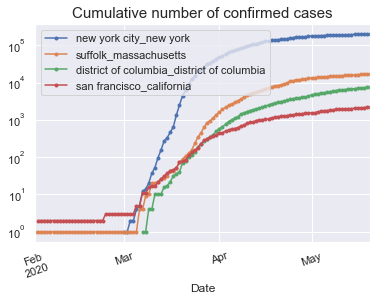

In [511]:
L = []
for county in counties_list:
    idx = confirmed_cases_df.county_state == county
    print(county, idx.sum())
    u = confirmed_cases_df.loc[idx, ['date', 'cases']].set_index('date')
    L.append(u)

temp_df = pd.concat(L, axis=1)
temp_df.columns = counties_list

## TO DO: figure out how to make this plot bigger ...
#this did not work for some reason...
#ax = plt.figure(figsize=(10, 10))

temp_df.plot(rot=20, marker='.')
plt.yscale('log')
plt.title('Cumulative number of confirmed cases', fontsize=15)
plt.xlabel('Date')
plt.legend(loc='best')
plt.show()

#### Confirmed cases plus timing of NPI adoptions

Based on the plot below, it is clear that both the number and timing of the adopted NPI's are correlated with the progression of the disease in these 4 counties. San Francisco which is the least hit by Covid19 among them also happens to have adopted all 9 NPI's (the maximum number in our dataset) before reaching its 100th case. New York City, on the other hand, has waited all the way until its 800th case to adopt the first 2 NPI's, and all the way its 10000th case to adopt the next 4 NPI's !!

While 4 data points is hardly enough for us to start making generalizations, it does offer a positive sign that we might be on to something.

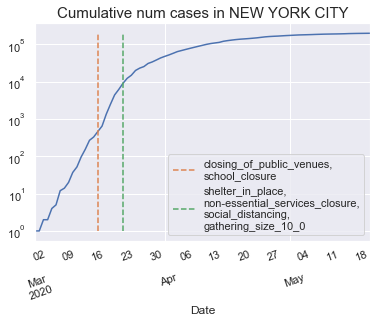

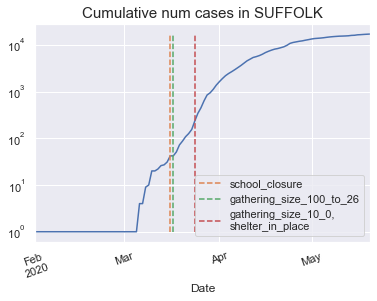

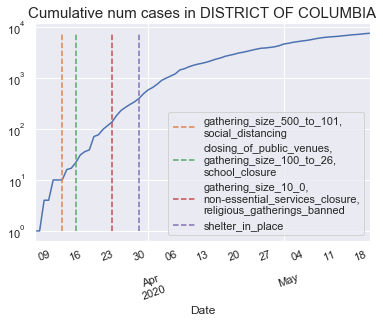

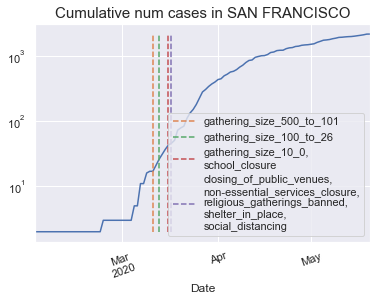

In [512]:
for i,county in enumerate(counties_list):
    confirmed_cases_ts = confirmed_cases_df.loc[confirmed_cases_df.county_state == county, ['date', 'cases']].set_index('date')
    npi_start_dates = npi_data_df.loc[npi_data_df.county_state == county]
    npi_start_dates = npi_start_dates.groupby('start_date').npi.agg(lambda x: x.tolist())
    
    confirmed_cases_ts.columns = ['']

    confirmed_cases_ts.plot(rot=20)
    plt.yscale('log')
    for start_date,npis_list in npi_start_dates.iteritems():
        plt.plot([start_date,start_date],[confirmed_cases_ts.min(),confirmed_cases_ts.max()], '--', label=',\n'.join(npis_list))

    county_name = county.split('_')[0].upper()
    plt.title(f'Cumulative num cases in {county_name}', fontsize=15)
    plt.xlabel('Date')
    plt.legend(loc='best')
    plt.show()

In [508]:
## not a very interesting plot, but will keep it around just in case ...

if False:
    temp_df2 = data_viz.get_num_npis_matrix().loc[counties_list].T.reindex(index=temp_df.index)

    temp_df2.plot(rot=20, marker='.')
    plt.ylabel('Cumulative num adopted NPI\'s')
    plt.xlabel('Date')
    plt.legend(loc='best')
    plt.show()

    temp_df3 = temp_df2.copy().T
    temp_df3.columns = temp_df3.columns.map(lambda x: x.strftime("%m-%d-%Y"))
    plt.figure(figsize=(15, 15))
    sns.heatmap(temp_df3, linewidths=.5, square=True,
                linecolor='white', annot=True, cmap="viridis", cbar=False, cbar_kws={"orientation": "horizontal"})
    plt.ylabel('')
    plt.xlabel('Date', fontsize=15)
    plt.xlabel('County', fontsize=15)
    plt.title('Cumulative number of adopted NPI\'s in each county by each date', fontsize=15, y=1.1)
    plt.show()

### Progression of disease over time in each county

In this section, we visualize the onset and progression of the disease over time in each county. Naturally, the disease reached different counties at different times, and progressed at different rates as well.

#### Onset date of disease

The plots below capture information about the disease during its early stages in each county.

1. Date of the Nth confirmed case in each county, for a small value of $N$.
2. Number of days between 10th and 100th case in each county

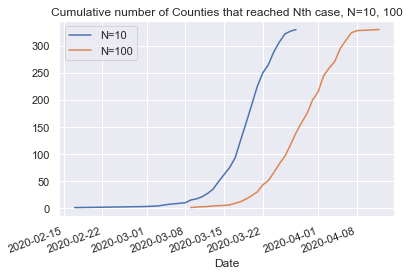

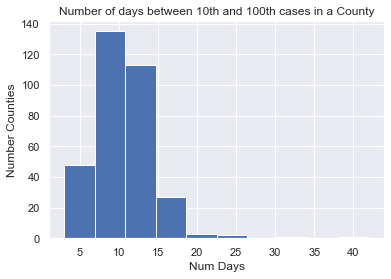

In [101]:
data_viz.nth_case_dates()

#### Number of daily new cases over time

The heatmap plot below helps us visualize the 3 main stages of the disease in any affected region: onset, peak, and recovery. Yellowish streaks along each row indicate the peak phase of the disease in a county, while purple regions indicate the beginning and recovery phases of the disease. Note that, in order to remove large range variations across different counties, the values in each row (county) have been scaled to the range [0,1].

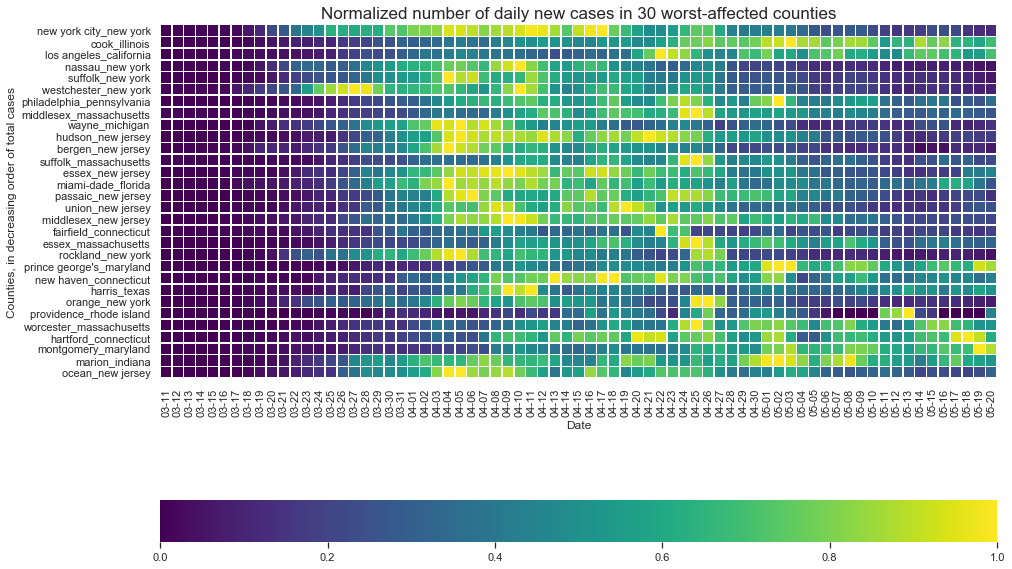

In [334]:
data_viz.num_daily_new_cases_over_time(n=50, K=30)

#### Three-day infection rate over time

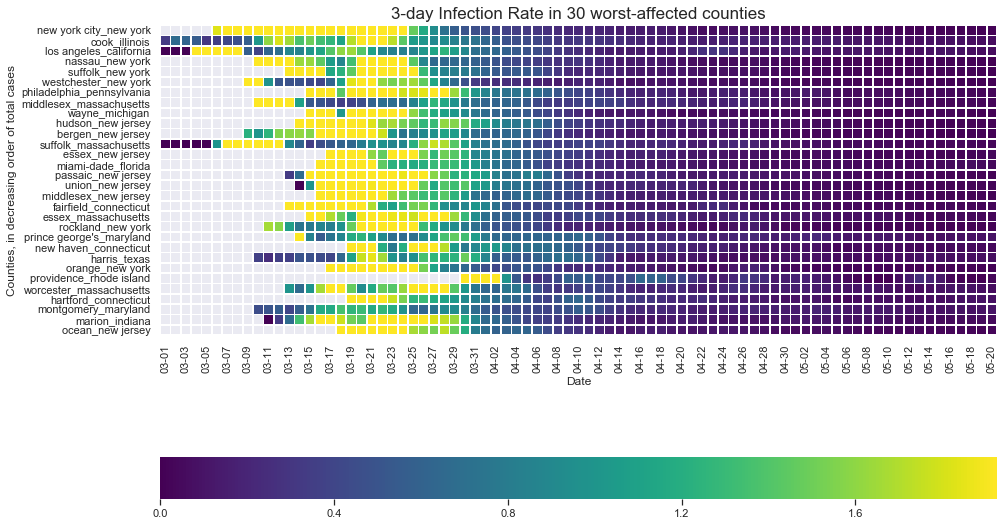

In [335]:
data_viz.infection_rate_over_time(num_periods=3, K=30, n=40)

*****

### NPI adoptions

The plots in this section aim to capture information about the variation in intervention strategies across different counties, both in terms of number of adopted NPI's and timing of the adoptions relative to the onset of the disease in a county. The existence of such variation is a prerequisite for the existence of a significant association between NPI's and disease progression.

#### Number of NPI's eventually adopted per county

The plot below suggests that the majority of counties have eventually adopted between 6 and 8 NPI's (from the maximum 9 NPI's). But the keyword here is *eventually*. The variable plotted here does not capture information about the timing of the adoptions. But 8 NPI's that have all been adopted too late will do little to curb the progression of the disease.

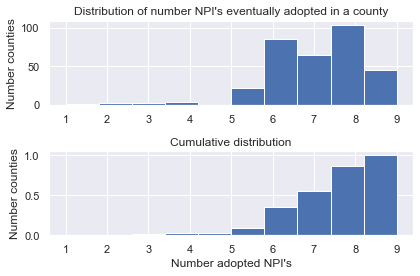

In [130]:
data_viz.num_adopted_NPIs_distribution()

#### Which NPI's were most/least adopted and when?

The 2 plots below capture information about each NPI aggregated over all counties, specifically about the distribution of their adoption rate among all 330 counties.

The first plot suggests not all NPI's are equally popular: school closures, closing of public venues and of non-essential services have close to 100% adoption, while limitations on gathering size stand at less than 50% adoption rate.

The second plot suggests significant variation in the adoption timing of NPI's: not all NPI's were adopted at the same time. School closures tended to be adopted the earliest, followed by closing of public venues and social distancing.

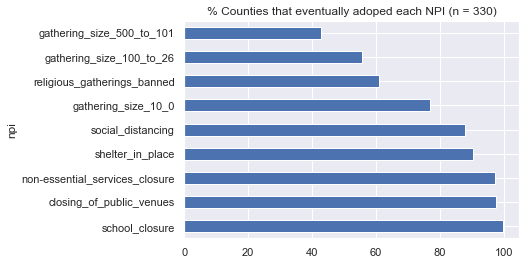

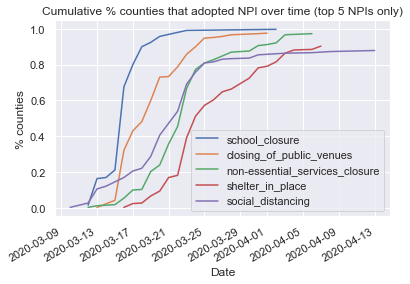

In [157]:
data_viz.percent_NPI_adoption(K=5)

#### Number of adopted NPI's over time

The plot below contains the total number of adopted NPI's versus time in the 50 most affected counties. The counties are ordered from top to bottom in decreasing order of total number of confirmed cases. 

A longer yellow streak along a row indicates earlier adoption of all NPI's in that county.

The plot suggests significant variation among the counties in the timing of NPI adoptions. However it is not clear from this plot that earlier adoption has an effect on the number of confirmed cases. This may be to the variation in the onset date of the disease across different counties. The plots in the next section will normalize for such variation.

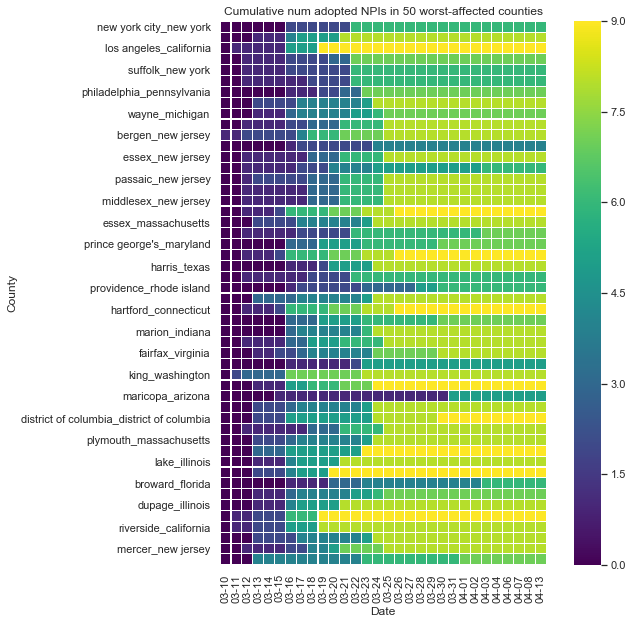

In [197]:
data_viz.num_adopted_NPIs_over_time(K=50)

****

### Association between disease progression and NPI adoptions

The plots in this section aim to explicitly capture the relationship between disease progression and NPI adoption from various different angle. In order to normalize for the unwanted variation in the onset date of the disease across different counties, we will use the date of the $N$th confirmed case in a county as the reference date in our representation of both disease progression and NPI adoptions, where $N$ is some small value to be chosen wisely. This is explained in more detail in the Section about feature extraction and engineering in the README file of the project.

#### Number of adopted NPI's relative to date of Nth confirmed case

In the two heatmaps below, the $(i,j)$th value is the number of adopted NPI's in the $i$th county within $j$ days of the date $N$th confirmed case in that county, for N=10 and 100. A negative value of j indicates number of days *before* that date, and a positive value indicates number of days *after* it.

Three main observations are in order:

1. Both heatmaps suggest that there is significant variation in how quickly counties have responded to the onset of the disease. The earliest adopter acted about 12 days before the 10th case (San Bernadino, California); the latest adopter acted about 25 days after the 10th case (Douglas, Nebraska). 

2. The yellowish streaks at the end of a row become longer as we move down the heatmap, which suggests that more severely affected counties (those at the top of the heatmap) tend to adopt later than those less affected.

3. The pattern noted above seems more pronounced at $N$=100 than $N$=10, suggesting that perhaps the 100th case is a better reference for the onset of the disease in a county.

**Relative to date of 10th case**

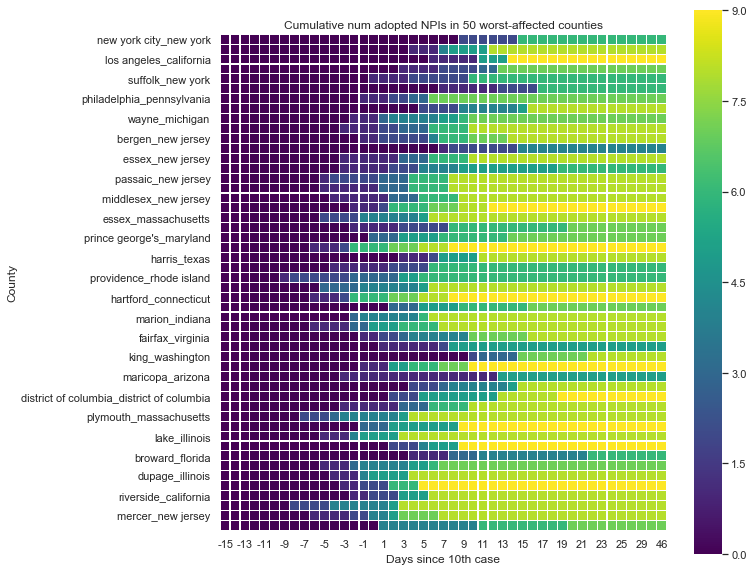

In [196]:
data_viz.num_adopted_NPIs_aligned_by_Nth_case(N=10, K=50)

**Relative to date of 100th case**

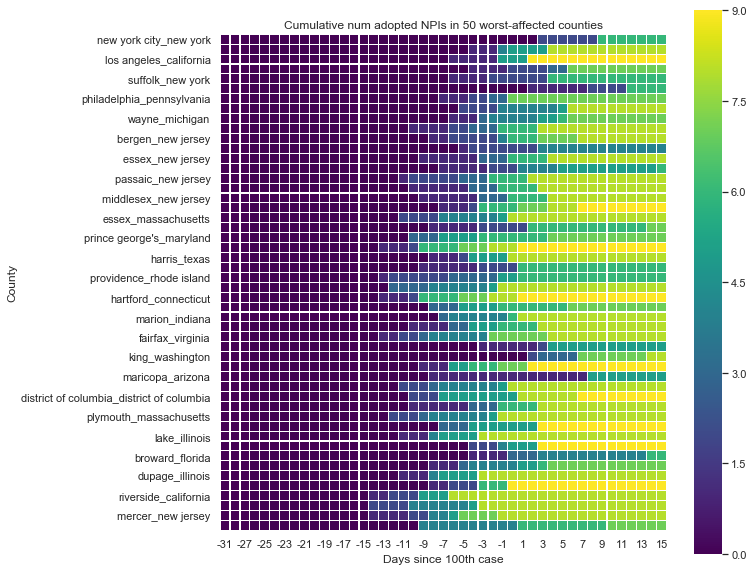

In [198]:
data_viz.num_adopted_NPIs_aligned_by_Nth_case(N=100, K=50)

#### Total number of confirmed cases vs. number of adopted NPI's

Let $t_0(c)$ denote the date corresponding to the $N$th confirmed case in county $c$. The plots in this section are bivariate plots of:

1. *log* of total number of confirmed cases at $K$ days after date $t_0(c)$, vs. 
2. total number of adopted NPI's prior to $t_0(c)$. 

The plots below correspond to a few different combinations of the $N$ and $K$ are parameters.

Based on these plots, a few observations are in order:

- There is a signifcant decreasing relationship between the two variables of interest.

- This relationship is **not linear**. There seems to be 3 distinct intervals of the number of adopted NPI's variable: 0, 1-2, and 3-9. This means that for example, to a certain extent, there is little difference between adopting 3 NPI's and 9 NPI's (a case of "diminishing returns" beyond 3 NPI's).

- This relationship is more pronounced with moderate values of $N$ (around 200) than extreme values (10, 500).

- The parameter $K$ does not appear to make much of a difference.

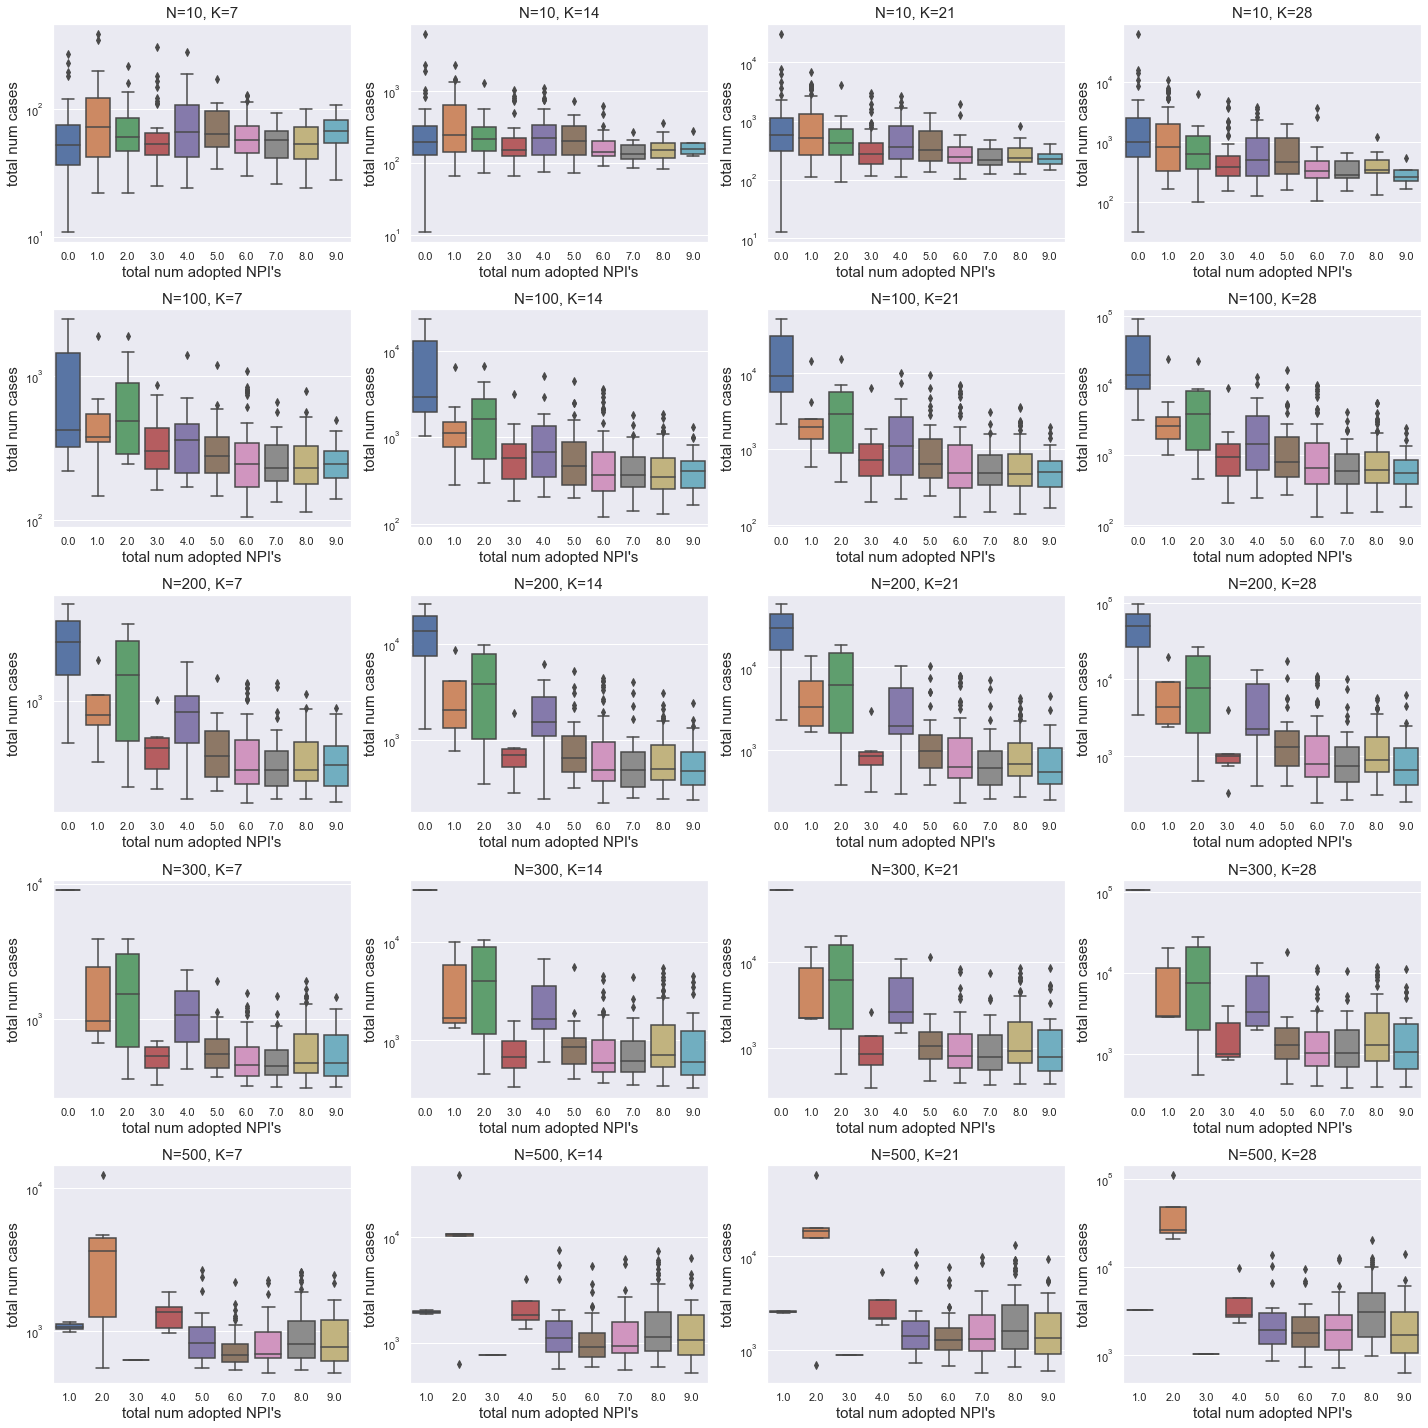

In [73]:
N_values = [100,200,300,500]
K_values = [7,14,21,28]

plt.figure(figsize=(20, 20))

for i,(N,K) in enumerate(itertools.product(N_values,K_values)):
    #print(N,K)
    plt.subplot(5,4,i+1)
    data_viz.total_cases_vs_num_adopted_npis(N=N, K=K)
plt.tight_layout()
plt.show()

#### Total number of confirmed cases vs. adoption timing of each NPI

While the plot in the previous section is aggregated over all NPI's (by only considering the total number of adopted NPI's), in this section we will plot the data of each NPI separately. Specifically, each one of the plots below is a bivariate plot of:

1. *log* of total number of confirmed cases at $K$ days after date $t_0(c)$, vs. 
2. number of days from the adoption of an NPI till date $t_0(c)$ (one variable per NPI).

In fact, these happen to be the target and predictor variables (features) in the predictive analysis in the next Section.

The plots below clearly capture more fine-grain information about the relationship between NPI adoptions and disease progression. Here are the key observations, some of which confirm and extend our observations about the previous plot:

- There is a non-linear decreasing relationship between the first variable and each of the other variables. 
- The relationship is most pronounced for the "closing of public venues" and "school closure" NPI's.
- All plots, except for the "school closure" plot, contain two major modes of variation: a vertical cluster of points at x=0 on the left and a semi-linear cluster of points on the right. This implies the relationship is strongly non-linear.

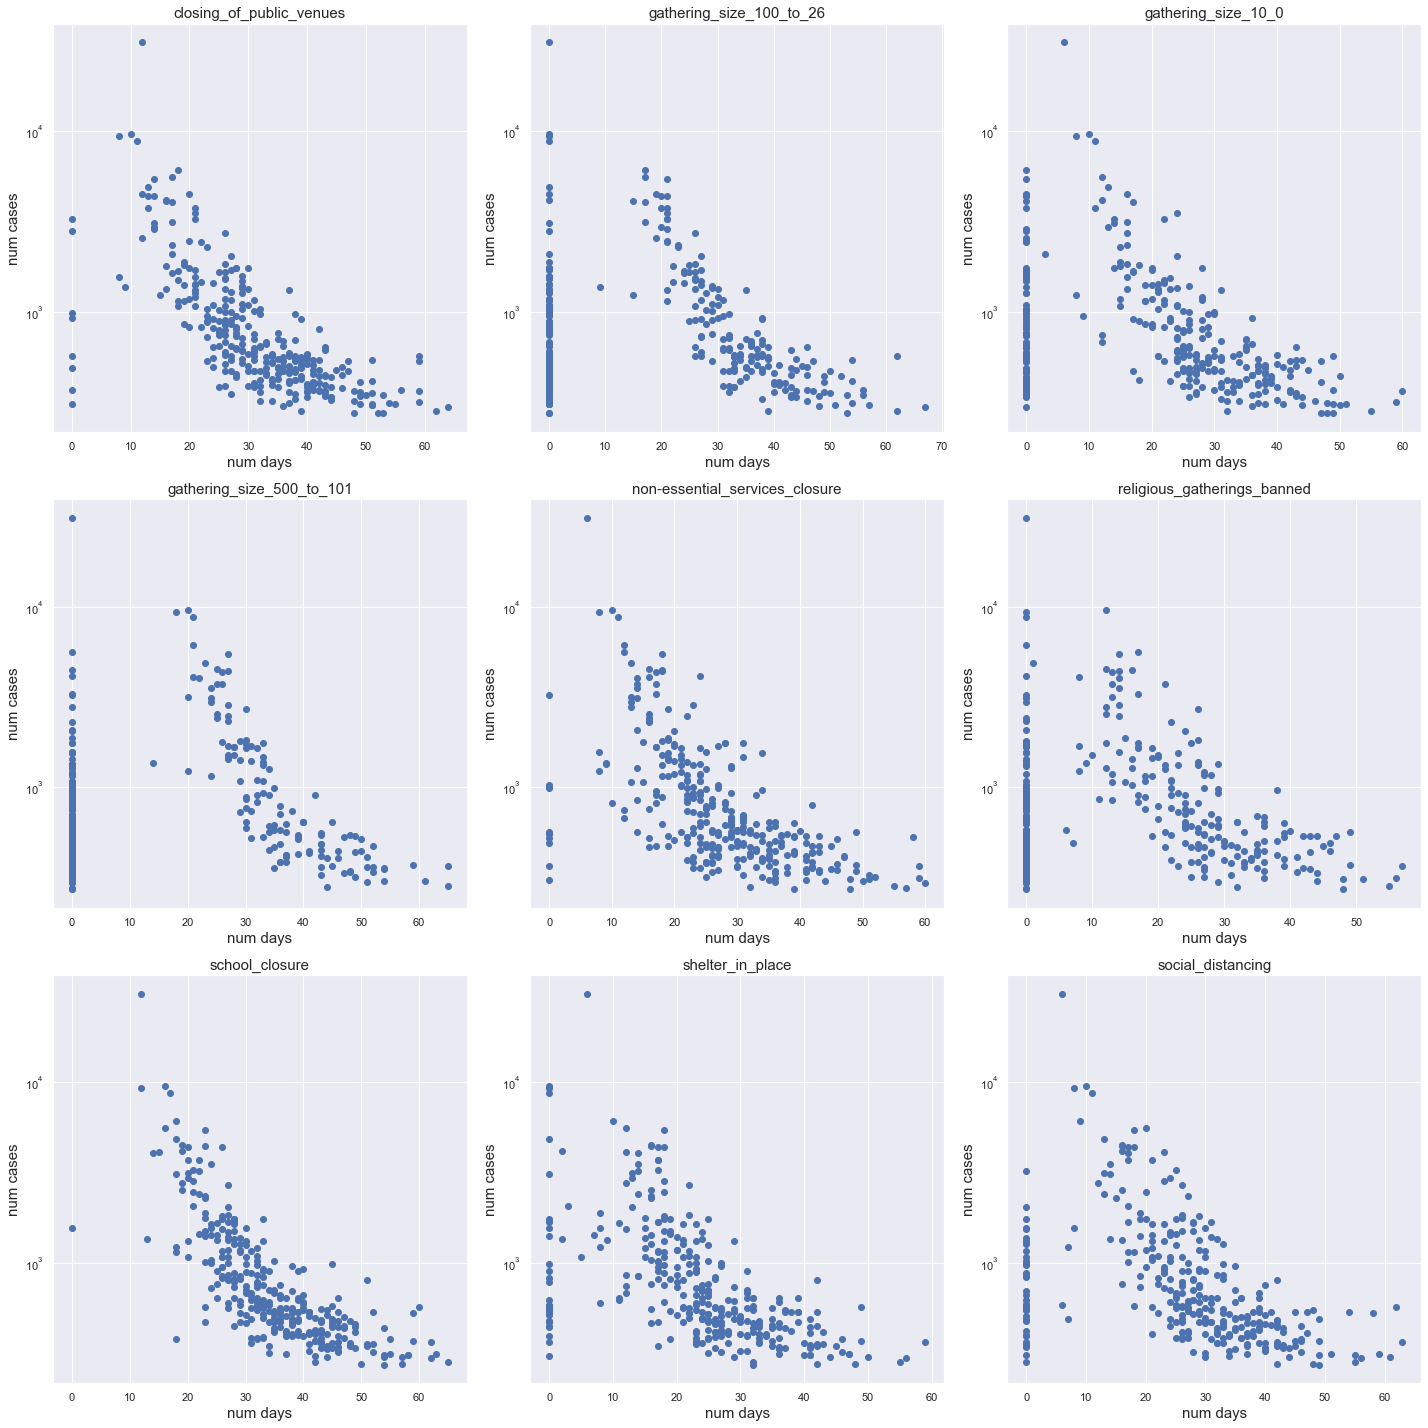

Wall time: 5.78 s


In [97]:
N = 250
K = 14

%time data_viz.total_cases_vs_npi_num_days(N=N, K=K)
plt.show()

#### Feature importance scoring

In the previous sub-section, we visualized the relationship between disease progression (the target variable) and the adoption timing of each NPI (the feature variables) and were able to qualitatively detect a significant relationship. We will now follow up with a quantitative evaluation of the strength of this relationship using classic methods of univariate feature selection in machine learning, basically ANOVA and mutual information.

Based on the plot below, we notice that:

- The two feature selection techniques almost agree on which features (hence NPI's) are most associated with the target variable (progression of the disease).

- The "closing of public venues" and "school closure" NPI's are most strongly associated with the target variable, which confirms our earlier observation based on visual inspection of the above scatterplots.

In [518]:
N = 250
K = 14

X, y = data_viz.total_cases_vs_npi_num_days(N=N, K=K, show_plots=False)
X.shape, y.shape

((309, 9), (309,))

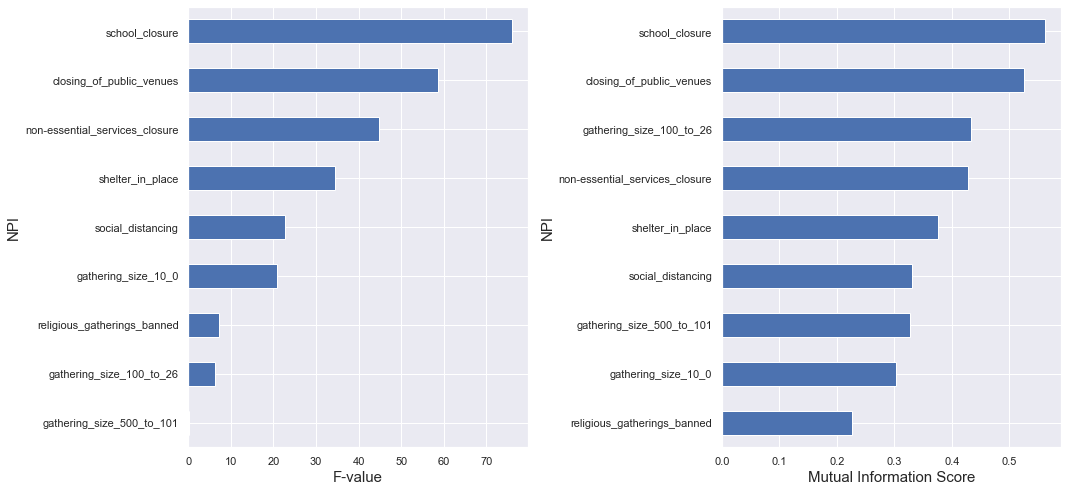

In [530]:
from sklearn.feature_selection import mutual_info_regression, f_regression

mutual_info_scores_df = pd.Series(mutual_info_regression(X, y, discrete_features='auto', \
                                                         n_neighbors=3, random_state=1), \
                                  index=X.columns).sort_values()

f_regression_scores_df = pd.DataFrame(f_regression(X,y)).T
f_regression_scores_df.index = X.columns
f_regression_scores_df.columns = ['score', 'pvalue']
f_regression_scores_df.sort_values(by='score', inplace=True)


plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
f_regression_scores_df.score.plot.barh()
plt.xlabel('F-value (ANOVA)', fontsize=15)
plt.ylabel('NPI', fontsize=15)

plt.subplot(1,2,2)
mutual_info_scores_df.plot.barh()
plt.ylabel('NPI', fontsize=15)
plt.xlabel('Mutual Information Score', fontsize=15)

plt.tight_layout()
plt.show()

***

### Key takeaways from the descriptive analysis

- There is a decreasing relationship between the progression of the disease and the total number of adopted NPI's, but only to some extent.  In particular, it seems that there is not a significant difference between 3 NPI's and more. This is probably because the adoption timing of NPI's is more important than their shear number; a few sufficiently early NPI's are more effective than a lot of NPI's that come too late.
- There is a decreasing relationship between the progression of the disease and adoption date of every NPI: earlier adoption is associated with slower progression of the disease (smaller number of total cases).
- This relationship seems most pronounced for the "closing of public venues" and "school closure" NPI's.
- This relationship is strongly non-linear for each NPI. In particular, non-adoption of a particular NPI is not associated with worst progression of the disease.

***************

## Predictive Analysis

The descriptive analysis in the previous section culminated in detecting a strong non-linear relationship between the progression of Covid19 disease and the timing of NPI adoptions.  We will now build a predictive model of this relationship. Predictive modeling is generally useful for predicting scenarios not in the dataset, something that descriptive analysis cannot do. In our case, a predictive model can be used to determine/plan NPI adoption strategies that correspond to a low number of cases.

**Target and feature variables**

- Target: *log* of total number of confirmed cases at $K$ days after the $N$th confirmed case in a county.

- Features: number of days from adoption of each NPI by a county till the $N$th confirmed case in that county, one variable per NPI.

where $N$ and $K$ are fixed integer parameters to be chosen wisely. 


**Regression models**

Since the target variable is continuous, we have experimented with a number of regression modeling techniques, and eventually selected the best one based on cross-validation performance:

- Linear ridge regression
- Support vector machines with linear kernel
- Support vector machines with RBF kernel
- K-Nearest Neighbors
- Random forests
- Stacked ensemble model of the above models

**Performance metric**

Because the target variable contains outliers, we have opted to use the **mean absolute error** (MAE) as the primary performance metric, though we will display the $R^2$ metric.

*****

### Feature extraction

In [70]:
fe = feature_engineering.FeatureEngineering(npi_data_df, confirmed_cases_df)

In [71]:
# let's fix the values of N and K parameters for now.
N = 150
K = 21

X = fe.get_NPI_agg_features2(N)
y = fe.get_target_vector2(N, K)
print(f"Number rows with missing values in target vector: {y.isnull().sum()}")
print(f"Number rows with missing values in feature matrix: {(X.isnull().sum(axis=1)>0).sum()}")
idx = y.notnull()
X = X.loc[idx]
y = y.loc[idx]
assert all(X.index == y.index)
assert y.isnull().sum()==0 and X.isnull().sum().sum()==0

Number rows with missing values in target vector: 5
Number rows with missing values in feature matrix: 2


In [72]:
X.shape, y.shape

((325, 9), (325,))

In [73]:
X.describe()

npi,closing_of_public_venues,gathering_size_100_to_26,gathering_size_10_0,gathering_size_500_to_101,non-essential_services_closure,religious_gatherings_banned,school_closure,shelter_in_place,social_distancing
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,12.923077,8.824615,8.033846,7.415385,9.332308,5.701538,15.766154,6.756923,10.138462
std,7.915268,9.879678,8.033999,9.951258,7.434511,7.757125,7.565808,6.814064,8.053595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,3.000000,0.000000,11.000000,0.000000,3.000000
50%,13.000000,5.000000,7.000000,0.000000,9.000000,0.000000,16.000000,5.000000,10.000000
75%,18.000000,17.000000,13.000000,15.000000,14.000000,10.000000,21.000000,11.000000,16.000000
max,40.000000,43.000000,40.000000,43.000000,40.000000,40.000000,42.000000,35.000000,43.000000


In [74]:
y.describe(percentiles=[.25,.5,.75,.9,.99])

count    325.000000
mean       2.896838
std        0.414384
min        2.235528
25%        2.600973
50%        2.789581
75%        3.120574
90%        3.473224
99%        4.053303
max        4.762986
Name: 21, dtype: float64

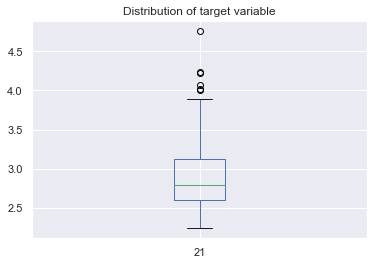

In [75]:
y.plot.box()
plt.title('Distribution of target variable')
plt.show()

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
## Split dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=402)
X_train.shape, X_test.shape

((260, 9), (65, 9))

### Model selection and cross validation

In [17]:
from sklearn.linear_model import Ridge   ##, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [19]:
# all models and their hyperparameter search grids

models = [
    ( "Ridge", 
     Ridge(normalize=False, alpha=500.0), 
     { 'alpha' : [1.0,10.0,100.0,300.0,500.0,700.0,1000.0] 
     } 
    ),
    ( "SVR-Linear Kernel",
      SVR(kernel='linear'),
     {'epsilon' : [0.001,0.01,0.1,0.3,0.5,0.7,1.0],
      'C': [0.001,0.01,0.1,0.5,1.0]
      }
    ),
    ( "SVR-RBF Kernel",
      SVR(kernel='rbf'), 
     {'gamma' : ['scale','auto'],
      'epsilon' : [0.001,0.01,0.1,0.3,0.5,0.7,1.0],
      'C': [0.001,0.01,0.1,0.5,1.0]
      }
    ),
    ( "KNN", KNeighborsRegressor(), { 'n_neighbors' : range(1,20) } ),
    ( "Random Forests",
      RandomForestRegressor(),
     {'max_depth': range(1,7),
      'n_estimators' : [10,50,100,200,300],
      'max_features': range(1,6)
      }
    )
]

len(models)

5

In [23]:
res_ = []

for model_name, model, param_grid_dict in models:
    print(f'\nFinding the best {model_name} model ...')

    %time tuple_res = prediction.build_regression_model( \
        X_train, y_train, X_test, y_test, model, param_grid_dict, cv=10, \
        scoring_fn='neg_mean_absolute_error', scoring_fn_name='MAE',\
        show_output=False, show_plots=False)

    res_.append(tuple_res[:-1])

print()


Finding the best Ridge model ...
Best hyperparameter values: {'alpha': 1000.0}, with average CV MAE= -0.20484793219276756
Wall time: 2.79 s

Finding the best SVR-Linear Kernel model ...
Best hyperparameter values: {'C': 0.001, 'epsilon': 0.001}, with average CV MAE= -0.2030645191413817
Wall time: 16.7 s

Finding the best SVR-RBF Kernel model ...
Best hyperparameter values: {'C': 1.0, 'epsilon': 0.1, 'gamma': 'scale'}, with average CV MAE= -0.1766594015499733
Wall time: 2.39 s

Finding the best KNN model ...
Best hyperparameter values: {'n_neighbors': 4}, with average CV MAE= -0.18025206247753617
Wall time: 705 ms

Finding the best Random Forests model ...
Best hyperparameter values: {'max_depth': 5, 'max_features': 5, 'n_estimators': 100}, with average CV MAE= -0.17591296336992363
Wall time: 2min 58s



In [24]:
df = pd.DataFrame(res_, 
                  columns = ['CV_R2_avg', 'CV_R2_std', 'CV_MAE_avg', 'CV_MAE_std', 'train_R2', 'train_MAE', 'test_R2', 'test_MAE'],
                  index = list(map(lambda x: x[0], models))
                 )
df.index.name = 'model'

df

,CV_R2_avg,CV_R2_std,CV_MAE_avg,CV_MAE_std,train_R2,train_MAE,test_R2,test_MAE
model,,,,,,,,
Ridge,0.580359,0.133391,0.206131,0.017214,0.632326,0.195292,0.575544,0.194029
SVR-Linear Kernel,0.574739,0.117046,0.204723,0.012016,0.623125,0.191245,0.565499,0.196218
SVR-RBF Kernel,0.691403,0.089216,0.175062,0.006712,0.813552,0.134883,0.660883,0.164876
KNN,0.666862,0.094286,0.185642,0.014999,0.822751,0.134516,0.586892,0.190083
Random Forests,0.670737,0.100512,0.177032,0.009947,0.857218,0.123111,0.603932,0.187776


#### In-depth performance evaluation of best model (SVR-RBF)

Best hyperparameter values: {'C': 1.0, 'epsilon': 0.1, 'gamma': 'scale'}, with average CV MAE= -0.1766594015499733

Performance of the selected model:

	Cross-validation performance:
	R2: 0.6914027708526511 +- 0.08921554018472397
	MAE: 0.17506240599798528 +- 0.006712260054756124

	Train set performance:
	R2: 0.8135519255272653
	MAE: 0.13488273886735583

	Test set performance:
	R2: 0.660882750051403
	MAE: 0.16487555118571606



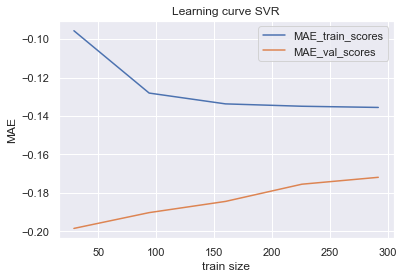

In [80]:
_ = prediction.build_regression_model( X_train, y_train, X_test, y_test, \
                                  SVR(kernel='rbf'), \
                                  {'gamma' : ['scale','auto'],
                                   'epsilon' : [0.001,0.01,0.1,0.3,0.5,0.7,1.0],
                                   'C': [0.001,0.01,0.1,0.5,1.0]
                                   }, \
                                  cv=10, \
                                  scoring_fn='neg_mean_absolute_error', scoring_fn_name='MAE', \
                                  #scoring_fn='r2', scoring_fn_name='R2', \
                                  show_output=True, show_plots=True)

*****

### Optimizing feature extraction hyperparameters

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
res_ = []
N_values = [50, 100, 150, 200, 250, 300]
K_values = [7,14,21,28]
L = itertools.product(N_values, K_values)

for N, K in L:

    print((N,K), end=' ')

    X = fe.get_NPI_agg_features2(N)
    y = fe.get_target_vector2(N, K)
    idx = y.notnull()
    X = X.loc[idx]
    y = y.loc[idx]
    assert all(X.index == y.index)
    assert y.isnull().sum()==0 and X.isnull().sum().sum()==0

    model = SVR(kernel='rbf', gamma='scale', C=0.5, epsilon=1e-1)

    ## Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=402)

    u = -cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    model.fit(X_train, y_train)
    r2score = model.score(X_test, y_test)
    mae_score = mean_absolute_error(y_test, model.predict(X_test))
    res_.append((N, K, idx.sum(), u.mean(), u.std(), mae_score, r2score))

df = pd.DataFrame(res_, columns=['N', 'K', 'count', 'mean CV MAE', 'std CV MAE', 'test MAE', 'test R2'])
df = df.set_index(['N', 'K'])
df.head()

(50, 7) (50, 14) (50, 21) (50, 28) (100, 7) (100, 14) (100, 21) (100, 28) (150, 7) (150, 14) (150, 21) (150, 28) (200, 7) (200, 14) (200, 21) (200, 28) (250, 7) (250, 14) (250, 21) (250, 28) (300, 7) (300, 14) (300, 21) (300, 28) 

count  mean CV MAE  std CV MAE  test MAE   test R2
N   K                                                     
50  7     330     0.145344    0.019280  0.139086  0.301362
    14    330     0.200289    0.029806  0.218323  0.426156
    21    330     0.233811    0.037562  0.262345  0.488292
    28    330     0.251867    0.037362  0.288260  0.481516
100 7     330     0.116061    0.013493  0.136824  0.495973

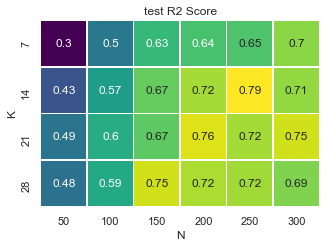

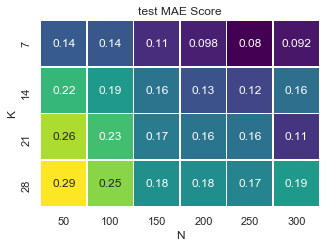

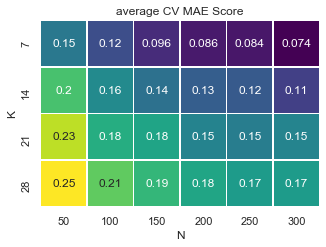

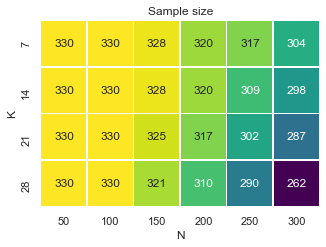

In [37]:
plt.figure(figsize=(5, 5))
df_temp = df.reset_index().pivot(index='N', columns='K', values='test R2').T

sns.heatmap(df_temp, linewidths=.5, square=True,
            linecolor='white', annot=True, cmap="viridis", cbar=False)  ##, cbar_kws={"orientation": "horizontal"}
plt.title('test R2 Score')
plt.show()


plt.figure(figsize=(5, 5))
df_temp = df.reset_index().pivot(index='N', columns='K', values='test MAE').T

sns.heatmap(df_temp, linewidths=.5, square=True,
            linecolor='white', annot=True, cmap="viridis", cbar=False)  ##, cbar_kws={"orientation": "horizontal"}
plt.title('test MAE Score')
plt.show()


plt.figure(figsize=(5, 5))
df_temp = df.reset_index().pivot(index='N', columns='K', values='mean CV MAE').T

sns.heatmap(df_temp, linewidths=.5, square=True,
            linecolor='white', annot=True, cmap="viridis", cbar=False)  ##, cbar_kws={"orientation": "horizontal"}
plt.title('average CV MAE Score')
plt.show()


plt.figure(figsize=(5, 5))
df_temp = df.reset_index().pivot(index='N', columns='K', values='count').T
sns.heatmap(df_temp, linewidths=.5, square=True, fmt='d',
            linecolor='white', annot=True, cmap="viridis", cbar=False)  ##, cbar_kws={"orientation": "horizontal"}
plt.title('Sample size')
plt.show()

**Conclusion**: best values are $N=200, K=14$

####  In-depth performance evaluation of best model with best feature extraction parameters

In [81]:
# let's fix the values of N and K parameters for now.
N = 200
K = 14

X = fe.get_NPI_agg_features2(N)
y = fe.get_target_vector2(N, K)
print(f"Number rows with missing values in target vector: {y.isnull().sum()}")
print(f"Number rows with missing values in feature matrix: {(X.isnull().sum(axis=1)>0).sum()}")
idx = y.notnull()
X = X.loc[idx]
y = y.loc[idx]
assert all(X.index == y.index)
assert y.isnull().sum()==0 and X.isnull().sum().sum()==0

Number rows with missing values in target vector: 10
Number rows with missing values in feature matrix: 8


In [82]:
X.shape, y.shape

((320, 9), (320,))

In [83]:
## Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=402)

Best hyperparameter values: {'C': 0.5, 'epsilon': 0.001, 'gamma': 'scale'}, with average CV MAE= -0.12189870888574265

Performance of the selected model:

	Cross-validation performance:
	R2: 0.7641305986166961 +- 0.04133970301091816
	MAE: 0.12442239551522513 +- 0.011079740967496012

	Train set performance:
	R2: 0.8242188315338365
	MAE: 0.09042539101367501

	Test set performance:
	R2: 0.7433743911415567
	MAE: 0.1257210348262873



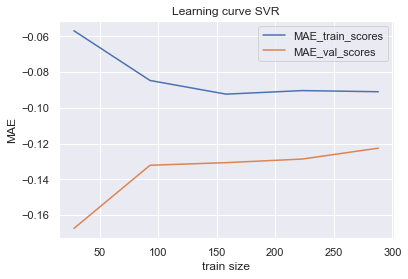

In [84]:
_ = prediction.build_regression_model( X_train, y_train, X_test, y_test, \
                                  SVR(kernel='rbf'), \
                                  {'gamma' : ['scale','auto'],
                                   'epsilon' : [0.001,0.01,0.1,0.3,0.5,0.7,1.0],
                                   'C': [0.001,0.01,0.1,0.5,1.0]
                                   }, \
                                  cv=10, \
                                  scoring_fn='neg_mean_absolute_error', scoring_fn_name='MAE', \
                                  #scoring_fn='r2', scoring_fn_name='R2', \
                                  show_output=True, show_plots=True)

****

### Stacked ensemble model

Stacking consists of feeding the outputs of individual estimators (which act as hyper-features) into another, second-level estimator. Obviously the accuracy of the new highl-level estimator is guaranteed to be better than of the individual estimators only if the outputs (predictions) of the latter are sufficiently de-correlated (i.e. non-redundant). That is why below we first visualize and calculate the correlation of our five individual estimators.

#### Correlation between individual estimtors

In [45]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn import base

In [46]:
class EstimatorTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, estimator):
        # What needs to be done here?
        self.estimator = estimator
    
    def fit(self, X, y):
        # Fit the stored estimator.
        # Question: what should be returned?
        self.estimator.fit(X,y)
        return self
    
    def transform(self, X):
        # Use predict on the stored estimator as a "transformation".
        # Be sure to return a 2-D array.
        return self.estimator.predict(X).reshape(-1, 1)

In [51]:
models = [
    Ridge(normalize=False, alpha=1000.0),
    SVR(kernel='linear', C=1e-3, epsilon=1e-3),
    SVR(kernel='rbf', gamma='scale', C=1.0, epsilon=1e-1),
    KNeighborsRegressor(n_neighbors=4),
    RandomForestRegressor(max_depth=5, max_features=5, n_estimators=100)
]

union = FeatureUnion([(f'{i}-{model.__class__.__name__}', EstimatorTransformer(model)) for i,model in enumerate(models)])
u = union.fit(X_train, y_train)
X_trans = u.transform(X_test)

df = pd.DataFrame(X_trans, columns=[f'{i}-{model.__class__.__name__}' for i,model in enumerate(models)])
df.corr()

,0-Ridge,1-SVR,2-SVR,3-KNeighborsRegressor,4-RandomForestRegressor
0-Ridge,1.000000,0.994925,0.913812,0.880085,0.927752
1-SVR,0.994925,1.000000,0.916551,0.878711,0.920172
2-SVR,0.913812,0.916551,1.000000,0.960035,0.962962
3-KNeighborsRegressor,0.880085,0.878711,0.960035,1.000000,0.963392
4-RandomForestRegressor,0.927752,0.920172,0.962962,0.963392,1.000000


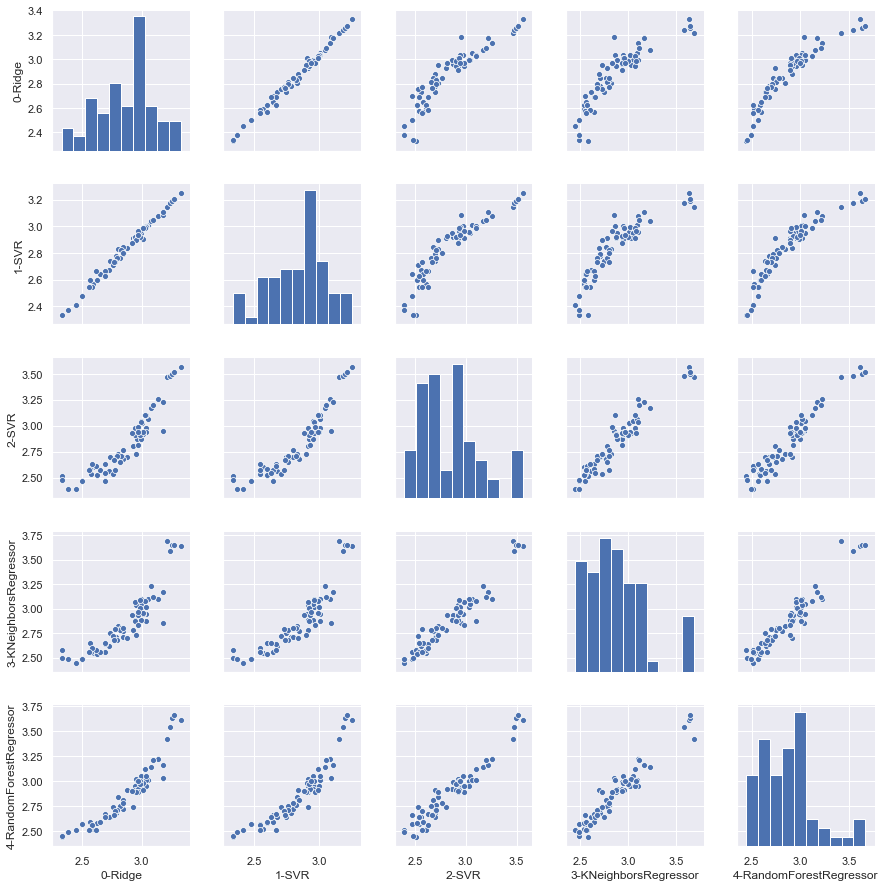

In [52]:
sns.pairplot(df)
plt.show()

#### Build ensemble model

We will not use the linear regression model in the ensemble because it is almost perfectly correlated with the linear SVR model.

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
models = [
    SVR(kernel='linear', C=1e-3, epsilon=1e-3),
    SVR(kernel='rbf', gamma='scale', C=1.0, epsilon=1e-1),
    KNeighborsRegressor(n_neighbors=4),
    RandomForestRegressor(max_depth=5, max_features=5, n_estimators=100)
]

union = FeatureUnion([(f'{i}-{model.__class__.__name__}', EstimatorTransformer(model)) for i,model in enumerate(models)])

pipe = Pipeline([('union', union),
                 ('ridge', Ridge(normalize=False))
                 #('dt', DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=5))
                ])


Performance of the selected model:

	Cross-validation performance:
	R2: 0.7623581267601167 +- 0.041695252890711756
	MAE: 0.12052362912045714 +- 0.006275504621863612

	Train set performance:
	R2: 0.8791403635919395
	MAE: 0.08443164511768271

	Test set performance:
	R2: 0.7155934282455914
	MAE: 0.13273826367476366



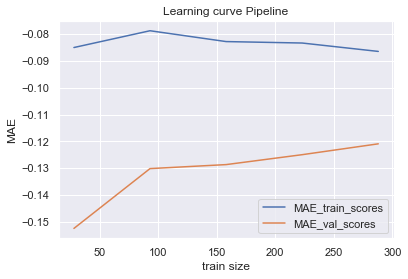

In [85]:
_ = prediction.build_regression_model(X_train, y_train, X_test, y_test, pipe, {}, 
                                      scoring_fn='neg_mean_absolute_error', scoring_fn_name='MAE',
                                     show_output=True, show_plots=True)

**Conclusion**: the ensemble model is not significantly better than the best individual model, SVR-RBF. This is not surprising because as shown in the correlation matrix above, the outputs of the individual estimators are quite highly correlated (90% or higher).

****

### Key takeaways of the predictive analysis

The best performing regression model (SVR-RBF) predicts the target variable to within $0.12 \pm 0.006$. This  is equivalent to stating we can predict the number of confirmed cases in a county 14 days after the date of the 200th case based on which NPI's it has adopted prior to the 200th case to within a ratio of around 1.3 - 1.34 of the true value.

In [87]:
10**(0.12 - 0.006), 10**(0.12 + 0.006)

(1.3001695780332903, 1.3365955165464423)

****

**EVERYTHING BELOW IS STILL WORK IN PROGRESS** (unfinished work)

## Prescriptive Analysis

Will build an interactive plot that allows the user to select NPI settings in order to determine predicted infection rate.

In [5]:
%matplotlib widget
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [91]:
npi_int_sliders = [ widgets.IntSlider(value=0, min=-30, max=30, step=1, description=npi_name) \
                   for npi_name in X.columns ]
len(npi_int_sliders)

9

In [92]:
npi_int_sliders[0]

IntSlider(value=0, description='closing_of_public_venues', max=30, min=-30)

In [103]:
output = widgets.Output()
output = widgets.Output(layout={'border': '1px solid black'})
#output.layout.width = '100%'
#output.layout.height = '100%'
output.layout.object_fit = 'cover'
output.layout.align_items = 'center'

In [110]:
select_location = widgets.Dropdown(
    options = list([(x,i) for i,x in enumerate(X.index)]),
    value=1,
    description='County:',
    disabled=False,
)
select_location

Dropdown(description='County:', index=1, options=(('ada_idaho', 0), ('adams_colorado', 1), ('alachua_florida',…

In [112]:
select_location.value

19

In [120]:
def get_npi_sliders(descr_values, init_values):
    int_sliders = [ widgets.IntSlider(value=init_value, min=-30, max=30, step=1, description=descr) \
                       for descr,init_value in zip(descr_values, init_values)]
    return int_sliders

In [ ]:
output = widgets.Output()
output = widgets.Output(layout={'border': '1px solid black'})
#output.layout.width = '100%'
#output.layout.height = '100%'
output.layout.object_fit = 'cover'
output.layout.align_items = 'center'

select_location = widgets.Dropdown(
    options = list([(x,i) for i,x in enumerate(X.index)]),
    value=1,
    description='County:',
    disabled=False,
)

npi_controls = widgets.VBox([widgets.Label('Number of days:')]+get_npi_sliders(X.columns, X.iloc[select_location.value,:]))
predicted_cases = widgets.VBox([widgets.Label('Predicted value:'),output])

modeling_box = widgets.HBox([npi_controls, predicted_cases])
dashboard = widgets.VBox([select_location, modeling_box])
display(dashboard)

In [ ]:
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):


In [115]:
widgets.VBox([select_location, modeling_box])

In [102]:
y = 3.21
y_err = 1.25

with output:
    output.clear_output()
    print(f"[{int(10**(y/y_err))}, {int(10**(y*y_err))}]")

*****

# Analyzing World Countries Dataset

## Read and preprocess raw data

**Raw data description**

The raw data of this dataset consists of a single CSV file.

Each row in this file corresponds to a unique (countRy, date) pair. A row basically contains the current strictness level of every NPI for a particular countRy on a particular date, as well as the cumulative number of confirmed Covid19 cases in that country on that date. 
 
 The strictness level of an NPI is an integer in the range 0-4, a value 0 indicates the NPI has not been adopted.


SCRATCH PAD

In [235]:
df1 = preprocessing.show_raw_data("Oxford", -1)
df1.shape

Raw dataset file contains {nrows} rows and {ncols} columns.


(25868, 42)

In [236]:
df1['Date'] = pd.to_datetime(df1.Date, yearfirst=True, format="%Y%m%d")
df1.Date.head()

0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-04
4   2020-01-05
Name: Date, dtype: datetime64[ns]

In [237]:
df2 = df1[['CountryName','Date','ConfirmedCases']]
df2.shape

(25868, 3)

In [164]:
df1.columns

Index(['CountryName', 'CountryCode', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'ContainmentHealthIn

In [166]:
df1.columns.str.contains('Index').sum()

10

In [185]:
df1.isnull().sum().sort_values(ascending=False)

M1_Wildcard                              25868
E1_Flag                                  19316
C5_Flag                                  17732
C6_Flag                                  15980
C7_Flag                                  15656
C2_Flag                                  15067
C4_Flag                                  14843
C1_Flag                                  13457
C3_Flag                                  13299
H1_Flag                                   8712
ConfirmedCases                            8471
ConfirmedDeaths                           8471
H4_Emergency investment in healthcare     1382
E4_International support                  1167
H2_Testing policy                         1140
H5_Investment in vaccines                 1112
E3_Fiscal measures                        1103
GovernmentResponseIndex                   1031
ContainmentHealthIndex                     963
H3_Contact tracing                         947
EconomicSupportIndex                       939
E1_Income sup

In [238]:
ts = df2.loc[df2.CountryName=='Tunisia'].set_index('Date')['ConfirmedCases']
ts.shape, ts.isna().sum()

((152,), 68)

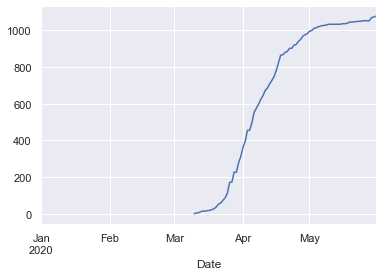

In [239]:
ts.plot()

In [245]:
ts.head(73)

Date
2020-01-01     NaN
2020-01-02     NaN
2020-01-03     NaN
2020-01-04     NaN
2020-01-05     NaN
              ... 
2020-03-09     NaN
2020-03-10     2.0
2020-03-11     5.0
2020-03-12     7.0
2020-03-13    13.0
Name: ConfirmedCases, Length: 73, dtype: float64

In [251]:
ts.iloc[:65]

Date
2020-01-01    NaN
2020-01-02    NaN
2020-01-03    NaN
2020-01-04    NaN
2020-01-05    NaN
             ... 
2020-03-01    NaN
2020-03-02    NaN
2020-03-03    1.0
2020-03-04    NaN
2020-03-05    NaN
Name: ConfirmedCases, Length: 65, dtype: float64

In [252]:
ts.iloc[:70]

Date
2020-01-01    NaN
2020-01-02    NaN
2020-01-03    NaN
2020-01-04    NaN
2020-01-05    NaN
             ... 
2020-03-06    NaN
2020-03-07    NaN
2020-03-08    NaN
2020-03-09    NaN
2020-03-10    2.0
Name: ConfirmedCases, Length: 70, dtype: float64

In [244]:
ts.tail(10)

Date
2020-05-22    1046.0
2020-05-23    1048.0
2020-05-24    1048.0
2020-05-25    1051.0
2020-05-26    1051.0
2020-05-27    1051.0
2020-05-28    1051.0
2020-05-29    1068.0
2020-05-30    1071.0
2020-05-31    1076.0
Name: ConfirmedCases, dtype: float64

In [275]:
def fill_missing_values_(ts):

    ## fill-in leading missing values with 0
    i = ts[ts>0].index.min()
    assert all(ts[ts.index<i].isnull() | (ts[ts.index<i]==0))
    ts.loc[ts.index<i] = 0

    ## forward fill trailing missing values
    ts.fillna(method='ffill', inplace=True)

    assert all(ts.notna())

ts2 = ts.copy()
fill_missing_values_(ts2)

In [271]:
ts2.head(65)

Date
2020-01-01    0.0
2020-01-02    0.0
2020-01-03    0.0
2020-01-04    0.0
2020-01-05    0.0
             ... 
2020-03-01    0.0
2020-03-02    0.0
2020-03-03    1.0
2020-03-04    1.0
2020-03-05    1.0
Name: ConfirmedCases, Length: 65, dtype: float64

In [272]:
ts2.head(75)

Date
2020-01-01     0.0
2020-01-02     0.0
2020-01-03     0.0
2020-01-04     0.0
2020-01-05     0.0
              ... 
2020-03-11     5.0
2020-03-12     7.0
2020-03-13    13.0
2020-03-14    16.0
2020-03-15    16.0
Name: ConfirmedCases, Length: 75, dtype: float64

In [274]:
ts.tail()

Date
2020-05-27    1051.0
2020-05-28    1051.0
2020-05-29    1068.0
2020-05-30    1071.0
2020-05-31    1076.0
Name: ConfirmedCases, dtype: float64

In [273]:
ts2.tail()

Date
2020-05-27    1051.0
2020-05-28    1051.0
2020-05-29    1068.0
2020-05-30    1071.0
2020-05-31    1076.0
Name: ConfirmedCases, dtype: float64

In [202]:
import math

colname = 'ConfirmedCases'

country_ts = df1.pivot(index='Date', columns='CountryName', values=colname)
country_ts = country_ts.applymap(lambda x: np.log10(x) if not math.isnan(x) and x>0 else x)
country_ts.shape

(153, 170)

In [203]:
country_ts.T.tail(20).head()

Date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01
CountryName,,,,,,,,,,,,,,,,,,,,,
Tajikistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.371068,3.406710,3.437433,3.491362,3.491362,3.491362,3.551816,3.551816,3.580583,NaN
Tanzania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.706718,2.706718,2.706718,2.706718,2.706718,2.706718,2.706718,2.706718,2.706718,NaN
Thailand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.482874,3.482874,3.483159,3.483159,3.483587,3.484869,3.486430,3.487986,3.488692,NaN
Timor-Leste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.380211,1.380211,1.380211,1.380211,1.380211,1.380211,1.380211,1.380211,1.380211,NaN
Trinidad and Tobago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.064458,2.064458,2.064458,2.064458,2.064458,2.064458,2.064458,2.064458,2.068186,NaN


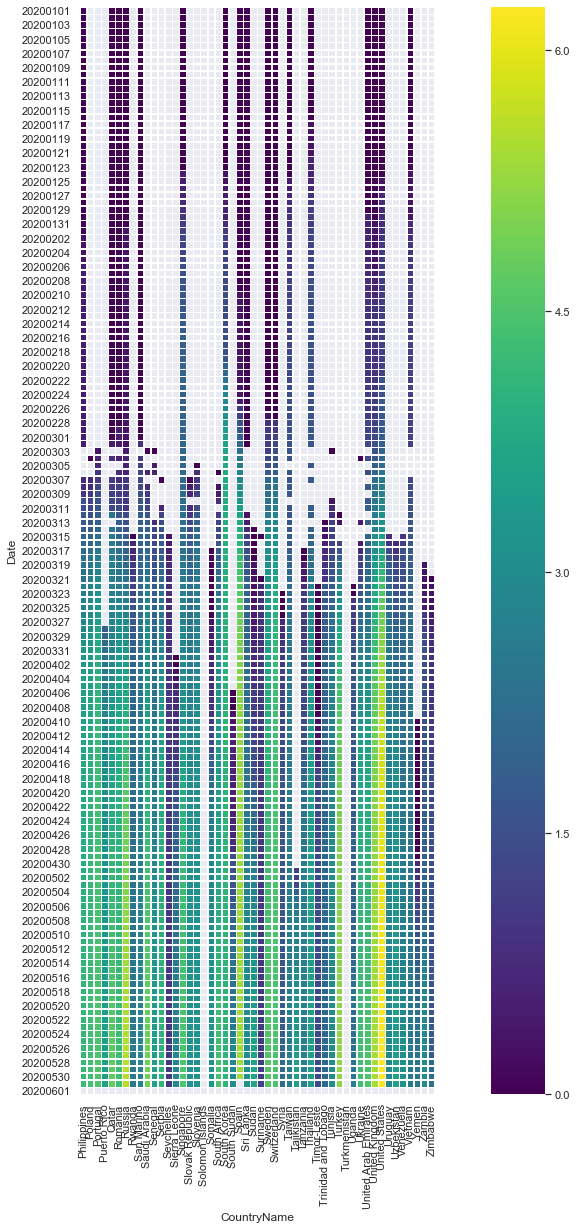

In [180]:
plt.figure(figsize=(20, 20))
sns.heatmap(country_ts.T.tail(50), fmt="d", linewidths=.5, square=True,
            linecolor='white', annot=False, cmap="viridis", cbar=True)
plt.show()


In [276]:
df1.shape

(25868, 42)

In [280]:
columns_to_remove = ['CountryCode', 'ConfirmedDeaths', 'M1_Wildcard', \
                     'H4_Emergency investment in healthcare', 'H5_Investment in vaccines' ]
columns_to_remove += df1.columns[df1.columns.str.contains('Index')].tolist()
columns_to_remove += df1.columns[df1.columns.str.startswith('E') | df1.columns.str.endswith('_Flag') ].tolist()

df1.drop(columns_to_remove, inplace=True, axis=1)
df1.shape

(25868, 14)

In [281]:
df1.columns

Index(['CountryName', 'Date', 'C1_School closing', 'C2_Workplace closing',
       'C3_Cancel public events', 'C4_Restrictions on gatherings',
       'C5_Close public transport', 'C6_Stay at home requirements',
       'C7_Restrictions on internal movement',
       'C8_International travel controls', 'H1_Public information campaigns',
       'H2_Testing policy', 'H3_Contact tracing', 'ConfirmedCases'],
      dtype='object')

In [283]:
len(NPI_columns)

11

In [282]:
NPI_columns = sorted(list(set(df1.columns) - {'CountryName', 'Date', 'ConfirmedCases'}))
NPI_columns

['C1_School closing',
 'C2_Workplace closing',
 'C3_Cancel public events',
 'C4_Restrictions on gatherings',
 'C5_Close public transport',
 'C6_Stay at home requirements',
 'C7_Restrictions on internal movement',
 'C8_International travel controls',
 'H1_Public information campaigns',
 'H2_Testing policy',
 'H3_Contact tracing']

In [307]:
df1.nunique()

CountryName                              170
Date                                     153
C1_School closing                          4
C2_Workplace closing                       4
C3_Cancel public events                    3
C4_Restrictions on gatherings              5
C5_Close public transport                  3
C6_Stay at home requirements               4
C7_Restrictions on internal movement       3
C8_International travel controls           5
H1_Public information campaigns            3
H2_Testing policy                          4
H3_Contact tracing                         3
ConfirmedCases                          5590
dtype: int64

In [308]:
df1.isnull().sum()

CountryName                                0
Date                                       0
C1_School closing                        761
C2_Workplace closing                     794
C3_Cancel public events                  800
C4_Restrictions on gatherings            813
C5_Close public transport                808
C6_Stay at home requirements             771
C7_Restrictions on internal movement     788
C8_International travel controls         789
H1_Public information campaigns          809
H2_Testing policy                       1140
H3_Contact tracing                       947
ConfirmedCases                          8471
dtype: int64

In [324]:
npi_ts = df1.loc[df1.CountryName=='Tunisia',['Date', 'C1_School closing']].set_index('Date')
npi_ts.head()

,C1_School closing
Date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0


In [347]:
u = df1.loc[df1.CountryName=='Tunisia',['Date', 'C1_School closing']].pivot_table(columns='C1_School closing', values='Date', aggfunc=min).T
u = u.reset_index()
u.shape

(4, 2)

In [348]:
u

,C1_School closing,Date
0,0.0,2020-01-01
1,1.0,2020-03-09
2,2.0,2020-03-13
3,3.0,2020-03-16


In [349]:
u['C1_School closing'] = u['C1_School closing'].map(lambda x: f'C1_School closing_{int(x)}')
u

,C1_School closing,Date
0,C1_School closing_0,2020-01-01
1,C1_School closing_1,2020-03-09
2,C1_School closing_2,2020-03-13
3,C1_School closing_3,2020-03-16


In [352]:
[('Tunisia',x[0], x[1]) for i,x in u.iterrows()]

[('Tunisia', 'C1_School closing_0', Timestamp('2020-01-01 00:00:00')),
 ('Tunisia', 'C1_School closing_1', Timestamp('2020-03-09 00:00:00')),
 ('Tunisia', 'C1_School closing_2', Timestamp('2020-03-13 00:00:00')),
 ('Tunisia', 'C1_School closing_3', Timestamp('2020-03-16 00:00:00'))]

In [340]:
i

3.0

In [341]:
y

Date   2020-03-16
Name: 3.0, dtype: datetime64[ns]

In [285]:
from sklearn.feature_extraction import DictVectorizer
from collections import Counter, defaultdict
from operator import itemgetter

d = defaultdict(list)

for country in df1.CountryName.unique():
    for npi in NPI_columns:
        # this is a two-column data frame
        u = df1.loc[(df1.CountryName==country), ['Date',npi]]
        u.dropna(axis=0, how='any', inplace=True)
        # this is a dictionary of strictness level counts, looks like: [(0.0, 89), (3.0, 63)]
        v = list(Counter(u[npi]).items())
        # this is a list that looks like: [('C1_School closing_0', 89), ('C1_School closing_3', 63)]
        w = list(map(lambda x: (f"{npi}_{int(x[0])}",x[1]), v))
        d[country].extend(w)

# convert d to a list of dictionaries
L = list(d.items())
z = list(map(lambda x: dict(x[1]), L))

# convert to a matrix
dv = DictVectorizer(sparse=False)
feature_matrix = dv.fit_transform(z)
feature_names = dv.feature_names_
row_names = list(map(itemgetter(0),L))
assert len(feature_names) == feature_matrix.shape[1] and len(row_names) == feature_matrix.shape[0]
feature_matrix.shape

ValueError: cannot convert float NaN to integer

In [160]:
## Show first few lines of the raw dataset

preprocessing.show_raw_data("Oxford")

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Aruba,ABW,20200106,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Aruba,ABW,20200107,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Aruba,ABW,20200108,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Aruba,ABW,20200109,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Aruba,ABW,20200110,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Preprocess the dataset and put it in a form that is easy to manipulate in downstream analysis.

In [156]:
npi_data_df2, confirmed_cases_df2 = preprocessing.get_clean_data ("Oxford")

npi_data_df2.shape, confirmed_cases_df2.shape

TypeError: cannot unpack non-iterable NoneType object

In [5]:
npi_data_df2.head()

,county_state,npi,start_date
584,chambers_alabama,social_distancing,2020-04-03
585,chambers_alabama,shelter_in_place,2020-04-04
587,chambers_alabama,gathering_size_500_to_101,2020-03-13
588,chambers_alabama,gathering_size_100_to_26,2020-03-16
590,chambers_alabama,gathering_size_10_0,2020-03-28


In [6]:
confirmed_cases_df.head()

,county_state,date,cases
0,snohomish_washington,2020-01-21,1
1,snohomish_washington,2020-01-22,1
2,snohomish_washington,2020-01-23,1
3,cook_illinois,2020-01-24,1
4,snohomish_washington,2020-01-24,1


## Descriptive Analysis

In [95]:
data_viz = visualization.DataViz(npi_data_df, confirmed_cases_df, location_type="County", location_type_plural="Counties")

In [96]:
data_viz.location_type

'County'

### Geographical distribution of covered counties

TO DO

- use circle size or hue proportional to number of confirmed cases in each county.